Create a new model, train it and evaluate it on the test set.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import dataset
import predict

Load existing data

In [2]:
data = pd.read_csv('data/EPL_processed_results.csv', index_col=0)

In [3]:
X_train, y_train, X_val, y_val, X_test, y_test = dataset.generate_train_val_test_sets(data)

Create new model

In [4]:
predictor = predict.Predictor()
predictor.load_train_val(X_train, y_train, X_val, y_val)

In [5]:
predictor.get_model(random_seed=666)

2022-03-28 22:33:06.620213: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
print(predictor.model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 15)               31        
 n)                                                              
                                                                 
 dense (Dense)               (None, 16)                256       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 338
Trainable params: 307
Non-trainable params: 31
_________________________________________________________________
None


Train the model on the train set and save the model

Epoch 1/100
89/89 [==============================] - 1s 4ms/step - loss: 1.3785 - accuracy: 0.3498 - val_loss: 1.0877 - val_accuracy: 0.4219
Epoch 2/100
89/89 [==============================] - 0s 2ms/step - loss: 1.1607 - accuracy: 0.3860 - val_loss: 1.0311 - val_accuracy: 0.4473
Epoch 3/100
89/89 [==============================] - 0s 2ms/step - loss: 1.1018 - accuracy: 0.4296 - val_loss: 1.0169 - val_accuracy: 0.4669
Epoch 4/100
89/89 [==============================] - 0s 2ms/step - loss: 1.0808 - accuracy: 0.4395 - val_loss: 1.0110 - val_accuracy: 0.4866
Epoch 5/100
89/89 [==============================] - 0s 2ms/step - loss: 1.0600 - accuracy: 0.4532 - val_loss: 1.0080 - val_accuracy: 0.4993
Epoch 6/100
89/89 [==============================] - 0s 2ms/step - loss: 1.0589 - accuracy: 0.4557 - val_loss: 1.0062 - val_accuracy: 0.5148
Epoch 7/100
89/89 [==============================] - 0s 2ms/step - loss: 1.0540 - accuracy: 0.4616 - val_loss: 1.0056 - val_accuracy: 0.5176
Epoch 8/100
8

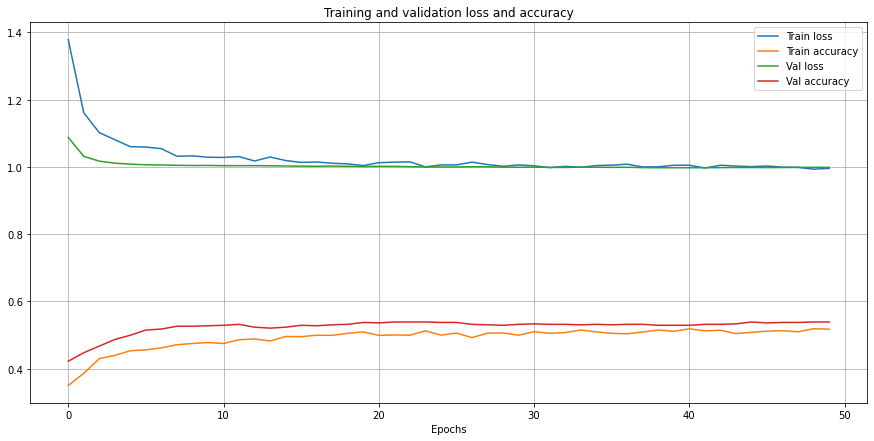

2022-03-28 22:33:20.481736: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model/assets
Model saved in model


In [7]:
predictor.train(plot=True, save_model=True)